In [1]:
%%capture
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Import Libraries

In [2]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import os

2024-08-02 03:38:55.187976: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-02 03:38:55.188097: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-02 03:38:55.319555: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Set Constant

In [3]:
img_size = 130
batch_size = 32
channels = 3
epochs = 10
input_shape = (batch_size, img_size, img_size, channels)
n_classes = 3

# Import data into tensorflow dataset object¶


In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("/kaggle/input/plastic-paper-garbage-bag-synthetic-images/Bag Classes/Bag Classes",
                                                             seed=123,
                                                             shuffle=True,
                                                             image_size=(img_size, img_size),
                                                             batch_size=batch_size)

Found 15000 files belonging to 3 classes.


In [5]:
classes_name = dataset.class_names
print(classes_name)

['Garbage Bag Images', 'Paper Bag Images', 'Plastic Bag Images']


In [6]:
def delete_images(classname):
    return ''.join(classname.split()[:2])

classes_name=dataset.class_names
classes_name=list(map(delete_images,classes_name))

In [7]:
print(classes_name)

['GarbageBag', 'PaperBag', 'PlasticBag']


#  Image Sample

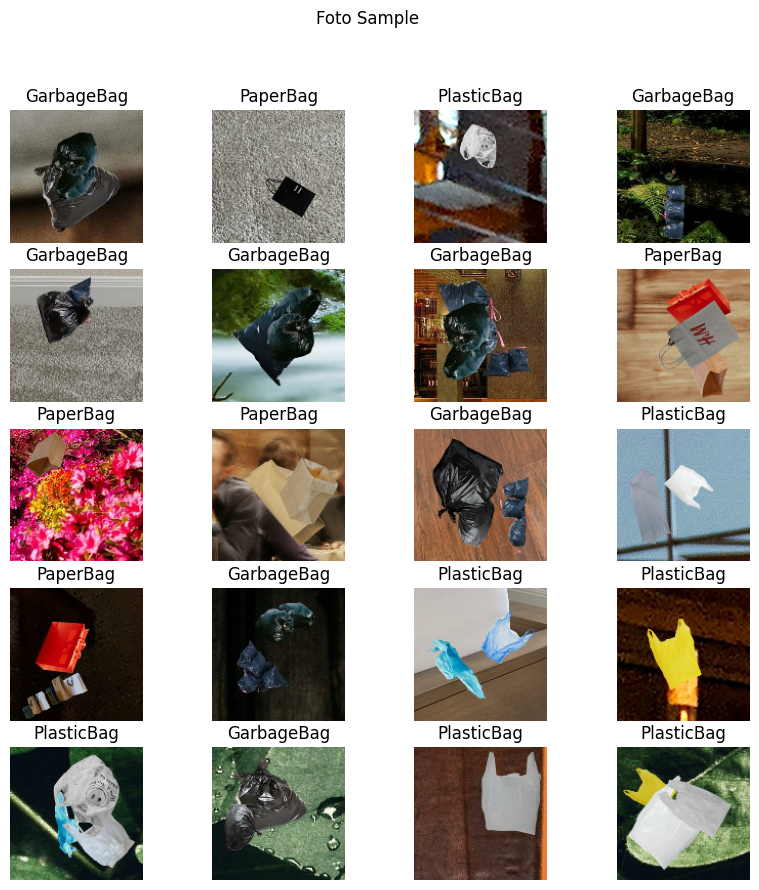

In [8]:
plt.figure(figsize=(10,10))
plt.suptitle("Foto Sample")
for batch_img, batch_label in dataset.take(1):
    for i in range(20):
        ax = plt.subplot(5,4,i+1)
        plt.title(classes_name[batch_label[i]])
        plt.imshow(batch_img[i].numpy().astype('uint8'))
        plt.axis('off')